#Lab 11
###Submitted by: Ahmed Khalid 200148
###Submitted to: Sir Awais

##Task done in Lab

In [1]:
import random
import numpy as np

In [2]:
data = np.array([[4,21], [4,17], [14,24], [12,21], [5,19], [3,16], [6,22], [10,24], [11,25], [10,21]])
data = np.array(data)
K = 2

In [3]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [4]:
num_points = data.shape[0]

initial_indices = random.sample(range(num_points), K)
centroids = data[initial_indices]

In [5]:
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(K)]
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point)
    return clusters

In [6]:
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        new_centroid = np.mean(cluster, axis=0) if cluster else np.array([0,0])
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [7]:
def kmeans(data, centroids, max_iters=100):
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)

        if np.all(centroids == new_centroids):
            print(f"Converged after {i+1} iterations")
            break

        centroids = new_centroids

    return centroids, clusters

In [8]:
final_centroids, final_clusters = kmeans(data, centroids)

print("Final centroids:\n", final_centroids.tolist())
for idx, cluster in enumerate(final_clusters):
    print(f"Cluster {idx+1}:\n", np.array(cluster).tolist())

Converged after 2 iterations
Final centroids:
 [[11.4, 23.0], [4.4, 19.0]]
Cluster 1:
 [[14, 24], [12, 21], [10, 24], [11, 25], [10, 21]]
Cluster 2:
 [[4, 21], [4, 17], [5, 19], [3, 16], [6, 22]]


##Task done at home using penguins dataset

In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

In [11]:
# Load Dataset
penguins_df = pd.read_csv("penguins.csv")

# Loading and examining the dataset
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


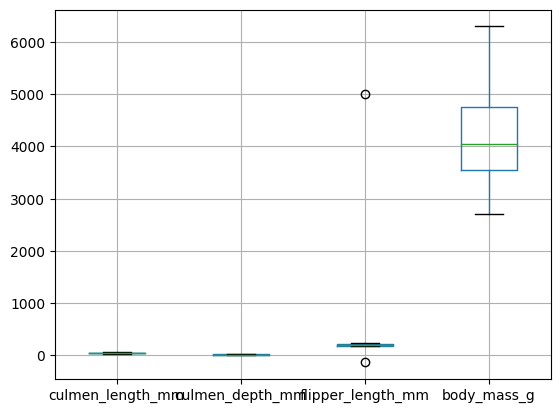

In [12]:
# Dealing with null values and outliers
penguins_df.boxplot()
plt.show()

In [13]:
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])

# Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
print(df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   sex_FEMALE  sex_MALE  
0       False      True  
1        True     False  
2        True     False  
4        True     False  
5       False      True  


In [14]:
# Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
print(penguins_preprocessed.head(10))

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.905520         0.793126          -1.428125    -0.569709   
1         -0.831938         0.128503          -1.071522    -0.507579   
2         -0.684775         0.435252          -0.429637    -1.191006   
3         -1.347011         1.099875          -0.572278    -0.942487   
4         -0.868729         1.764498          -0.786240    -0.693968   
5         -0.942311         0.333002          -1.428125    -0.725033   
6         -0.887125         1.253249          -0.429637     0.579691   
7         -0.537611         0.230753          -1.356804    -1.253136   
8         -0.997497         2.071247          -0.714919    -0.507579   
9         -1.365406         0.333002          -1.142843    -0.631839   

   sex_FEMALE  sex_MALE  
0   -0.991031  0.997001  
1    1.009050 -1.003008  
2    1.009050 -1.003008  
3    1.009050 -1.003008  
4   -0.991031  0.997001  
5    1.009050 -1.003008  
6   -0.991031  0.997001  

In [15]:
# Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
print(dfx_pca.explained_variance_ratio_)
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]
2


In [16]:
# Number of clusters
K = 4

# Function to compute the Euclidean distance between two points
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Number of data points
num_points = penguins_PCA.shape[0]

# Randomly initialize centroids by selecting K data points
initial_indices = random.sample(range(num_points), K)
centroids = penguins_PCA[initial_indices]

In [17]:
# Function to assign points to the nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(K)]
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point)
    return clusters

In [18]:
# Function to update centroids
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        new_centroid = np.mean(cluster, axis=0) if cluster else np.array([0] * len(clusters[0]))
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [19]:
# Function to perform K-means clustering
def kmeans(data, centroids, max_iters=100):
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)

        # Check for convergence
        if np.all(centroids == new_centroids):
            print(f"Converged after {i+1} iterations")
            break

        centroids = new_centroids

    return centroids, clusters

Converged after 3 iterations


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


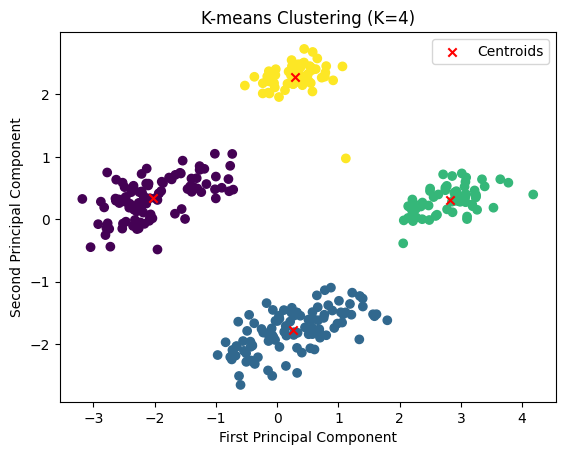


Final centroids:
 [[-2.02559162  0.33725103]
 [ 0.29618153  2.27350811]
 [ 2.82671655  0.30596508]
 [ 0.25314985 -1.78195008]]
Cluster 1:
 [[-1.9293044   0.4121497 ]
 [-1.95352479  0.3084854 ]
 [-2.28817761 -0.15827773]
 [-2.29152165  0.12644555]
 [-2.33416049  0.15078107]
 [-2.29097852  0.19172242]
 [-2.03556313  0.01409269]
 [-2.7868264  -0.14276205]
 [-2.80192041 -0.25463941]
 [-2.25960046 -0.14764826]
 [-2.35187589 -0.10802186]
 [-2.23509243  0.1561931 ]
 [-3.04481322 -0.44846709]
 [-2.49485913  0.32855442]
 [-2.20946064  0.215237  ]
 [-2.1372535   0.5712692 ]
 [-2.16582005 -0.07477592]
 [-2.72211005 -0.44061407]
 [-2.76587976 -0.06557282]
 [-2.74083453 -0.15451531]
 [-2.62934802  0.31844414]
 [-2.33397377  0.20191942]
 [-2.13533956  0.25063315]
 [-2.41393403  0.18461162]
 [-2.92081937 -0.07960675]
 [-2.13554517  0.31439783]
 [-2.87704097  0.28124726]
 [-2.63837943  0.33062618]
 [-2.20976996  0.43626328]
 [-2.82262097  0.1888527 ]
 [-2.12887198  0.81182706]
 [-2.49022642  0.514528

In [20]:
# Run K-means clustering
final_centroids, final_clusters = kmeans(penguins_PCA, centroids)

# Plotting the clusters
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=KMeans(n_clusters=K).fit_predict(penguins_PCA), cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={K})")
plt.legend()
plt.show()

# Print final centroids and clusters
print("\nFinal centroids:\n", final_centroids)
for idx, cluster in enumerate(final_clusters):
    print(f"Cluster {idx+1}:\n", np.array(cluster))